In [219]:
from manim import *
import pandas as pd

In [224]:
INPUT_FILE_PATH = "../data/example_input.txt"
OUTPUT_FILE_PATH = "../data/example_output.txt"
TARGET_PARTICLE_ID = "14"

with open(INPUT_FILE_PATH, 'r') as f:
    N = int(f.readline().rstrip())
    L = int(f.readline().rstrip())
    M = int(f.readline().rstrip())
    Rc = int(f.readline().rstrip())

particles_df = pd.read_table(
    INPUT_FILE_PATH,
    delim_whitespace=True,
    names=["id ", "x", "y", "r"],
    skiprows=4
)

out_particles_df = pd.read_table(
    OUTPUT_FILE_PATH,
    delim_whitespace=True,
    dtype = str,
    header=None,
)

In [225]:
print(f"""N={N}, L={L}, M={M}, Rc={Rc}""")
particles_df

N=100, L=100, M=8, Rc=10


,id,x,y,r
0,0,86.936856,45.316160,1.837293
1,1,82.318046,76.008945,3.305538
2,2,22.993498,68.493791,1.627378
3,3,60.956702,20.500474,4.665454
4,4,63.602024,84.976375,1.605259
...,...,...,...,...
95,95,94.441307,95.527458,3.496390
96,96,54.019573,37.405162,1.349673
97,97,95.218237,52.354568,3.471978
98,98,43.788607,19.748488,3.370142


In [226]:
out_particles_df

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,1,2,3,NaN,NaN,NaN
2,14,1,NaN,NaN,NaN,NaN


In [239]:
# TODO: agarar del archivo los vecinos de forma correcta y pasarlo a un diccionario de listas
target_neighbours_ids = out_particles_df.loc[out_particles_df.iloc[1] == "TARGET_PARTICLE_ID"]
target_neighbours_ids

,0,1,2,3,4,5
1,1,2,3,NaN,NaN,NaN


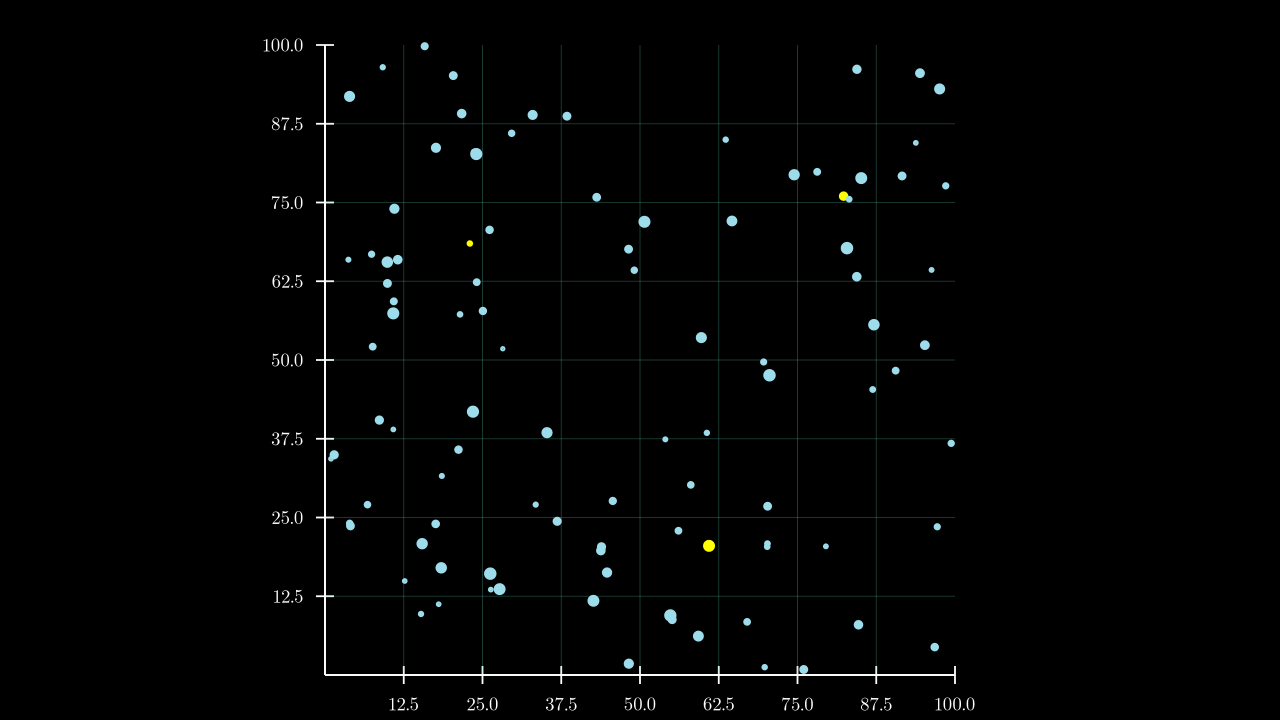

In [214]:
%%manim -qm -v WARNING CellIndexMethodScene

class CellIndexMethodScene(Scene):
    
    def construct(self):
        self.add(self.axes, self.domain, *self.particles)
        
    @property
    def particles(self):
        particles = []
        for _, row in particles_df.iterrows():
            scalated_radius = row["r"] / L
            current_id = str(int(row[0]))
            if current_id in target_neighbours_ids:
                particle = Circle(radius=scalated_radius, color=YELLOW, fill_opacity=1).move_to(self.axes.c2p(row["x"], row["y"], 0))
            elif current_id == TARGET_PARTICLE_ID:
                particle = Circle(radius=scalated_radius, color=RED, fill_opacity=1).move_to(self.axes.c2p(row["x"], row["y"], 0))
            else:
                particle = Circle(radius=scalated_radius, color=BLUE_B, fill_opacity=1).move_to(self.axes.c2p(row["x"], row["y"], 0))
            particles.append(particle)
        return particles
    
    @property
    def domain(self):
        return NumberPlane(
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 1,
                "stroke_opacity": 0.3
            },
            x_range=self.cels_tuple,
            y_range=self.cels_tuple,
            x_length=7,
            y_length=7,
        )
        
    @property
    def axes(self):
        return Axes(
            x_range=self.cels_tuple,
            y_range=self.cels_tuple,
            x_length=7,
            y_length=7,
            axis_config={
                "font_size": 20,
            },
            tips=False,
        ).add_coordinates()

        
    @property
    def cels_tuple(self):
        """
        The number of cels is defined by M*M, 
        this vector represents the [x_min, x_max, x_step]
        """
        return [0, L, L / M]
